# 1. Data Exploration

The dataset is first loaded for basic checks of dataset, including its size, completeness, fields and data types, as well as the meaning of each column and what it represents in real life (e.g., lifestyle, eating habits). These checks ensure that the data is analysis-ready, and help us understand how the features may influence the target variable, obesity level.

Next, a distribution analysis is performed to examine how the data is spread across features. This helps identify whether variables are imbalanced, whether they contain sufficient variation, and whether they are informative enough to be used in predicting obesity levels. These insights directly support our research questions on predictive dodelling (What level of accuracy can machine learning models achieve when classifying individuals into obesity categories based on eating habits and physical condition?) and model optimisation (How does limiting or selecting different feature sets, combined with preprocessing techniques, affect classification accuracy and interpretability?).

Finally, a correlation analysis is conducted to explore relationships between key features and the target variable. This step also addresses our research question on feature importance (Which lifestyle and demographic factors most strongly influence obesity classification in this dataset?), as well as contributing to the other two questions above.

## 1.1 Load Data

In [182]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
file_url = '/Users/rootx/DataScience_Std/DSI/ObesityDataSet_raw_and_data_sinthetic 2.csv'

In [184]:
df = pd.read_csv(file_url)

In [187]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 1.2 Basic Checks & Stats

### 1.2.1 Dataset Overviwe

#### Dataset size: 2111 entries x 17 columns.
#### Fileds: 
1. 1 target variable: "NObeyesdad" with 7 categories ('Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III').
2. 8 numerial variables: "Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE".
3. 8 categorical variables: "Gender",	"family_history_with_overweight", "FAVC", "CAEC", "SMOKE",	"SCC", "CALC",	"MTRANS".

#### Specific Field Explaination
Besides features with obvious meanings, such as **'Age', 'Height', 'Weight', 'Gender', 'family_history_with_overweight'**, here are the meanings of abbreviated features:

**Diet & Eating Habits**
1. FAVC: Do you eat high caloric food frequently?
2. FCVC: Do you usually eat vegetables in your meals?
3. NCP: How many main meals do you have daily?
4. CAEC: Do you eat any food between meals?
5. CH2O: How much water do you drink daily?
6. SCC: Do you monitor the calories you eat daily?

**Smoke & Alcohol Intake**
1. SMOKE: Do you smoke?
2. CALC: How often do you drink alcohol?

**Exercise & Activity**
1. FAF: How often do you have physical activity?
2. TUE: How much time do you use technological devices such as cell phone, videogames, television, computer and others?
3. MTRANS: Which transportation do you usually use?


In [188]:
# Create a copy of the dataframe
df_exp = df.copy()

In [195]:
df_exp.shape

(2111, 17)

In [189]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [205]:
# List of categorical columns
# Since `over_time` is our target variable, we are excluding it
cat_cols = [col for col in df.columns if df.dtypes[col] == 'object' and col != 'NObeyesdad']

# List of numerical columns
num_cols = [col for col in df.columns if (df.dtypes[col] != 'object' and col != 'NObeyesdad')]

print('Numerical Features are : ',num_cols)
print('\n\nCategorical Features are : ',cat_cols)

Numerical Features are :  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


Categorical Features are :  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


### 1.2.2 Completeness
* No missing values for all column

In [193]:
# check missing values 
print("Missing values per column:")
print(df_exp.isnull().sum())

Missing values per column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


### 1.2.3 Descriptive Statistics
* Understanding data through descriptive statistics
* For numerical variables: Mean and distribution characteristics.
* For categorical variables: Category counts and dominant categories across features.

In [17]:
# numerical variables
df.describe().round(2)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [18]:
# categorical variables
df_exp.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [202]:
# variables with multi-categories
print(df_exp["NObeyesdad"].unique())
print(df_exp['CAEC'].unique())
print(df_exp['CALC'].unique())
print(df_exp['MTRANS'].unique())


['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


## 1.3 Distribution

#### What do we know about the dataset:
Here is a simple profile portrait based on the dataset, focusing on demographic, lifestyle, and eating habit features that are dominated by one a specific category or within a specific range (>50%). The main profile of individuals in this dataset is:

Age: mostly young, below 30s

Eating habits and awareness: sometimes eating high-caloric food, typically having three main meals a day, and occasionally eating food between meals, generally not monitoring daily calorie intake

Smoking & alcohol: non-smokers, but sometimes consuming alcohol

Lifestyle/transportation: primarily using public transportation


#### Which features could be informative or contributable for modeling?
We expect potential features to be fairly distributed, providing more informative massage to the model.

#### Conclusions 
* Potential informative features for further exploration: 'Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE', 'Gender', 'FAVC', 'CAEC'.
* Other features, thought they may be dominated by specific range or categories, they can be helpful for explaining and can be used to draw insights from the analysis and models.


### 1.3.1 Data Preprocessing 
* Assign orders to some categorical variables to make the analysis more user-friendly, and readable when plotting

* Extra binary column "is_obe" is created to analyse which features contribute to obesity.

In [228]:
# assign order to 'CAEC' and 'CALC'
fre_order = [
    'no',
    'Sometimes',
    'Frequently',
    'Always'
]

df_exp['CAEC'] = pd.Categorical(df_exp['CAEC'], categories=fre_order, ordered=True)
df_exp['CALC'] = pd.Categorical(df_exp['CALC'], categories=fre_order, ordered=True)

# assign order to the target variable 'NObeyesdad'
obe_order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

df_exp['NObeyesdad'] = pd.Categorical(df_exp['NObeyesdad'], categories=obe_order, ordered=True)
df_exp['is_obesity'] = np.where(
    df_exp['NObeyesdad'].isin(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']),
    1,
    0
)
                                                                                                     

### 1.3.2 Target Variable
* All obesity levels are fairly evenly distributed, except for Obesity_Type_I, which is slightly more prevalent.

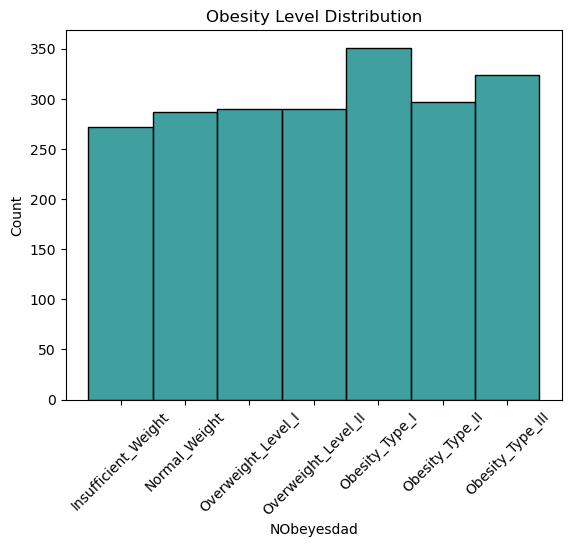

In [235]:
sns.histplot(data=df_exp, 
             x="NObeyesdad", color='teal')    

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.xticks(rotation=45)

plt.title("Obesity Level Distribution")
plt.show()

### 1.3.3 Numerical Features
* "NCP" (How many main meals do you have daily?) is dominated by 3, which indicates that How many main meals per day may not be informative in this dataset, in terms of predicting obesity.

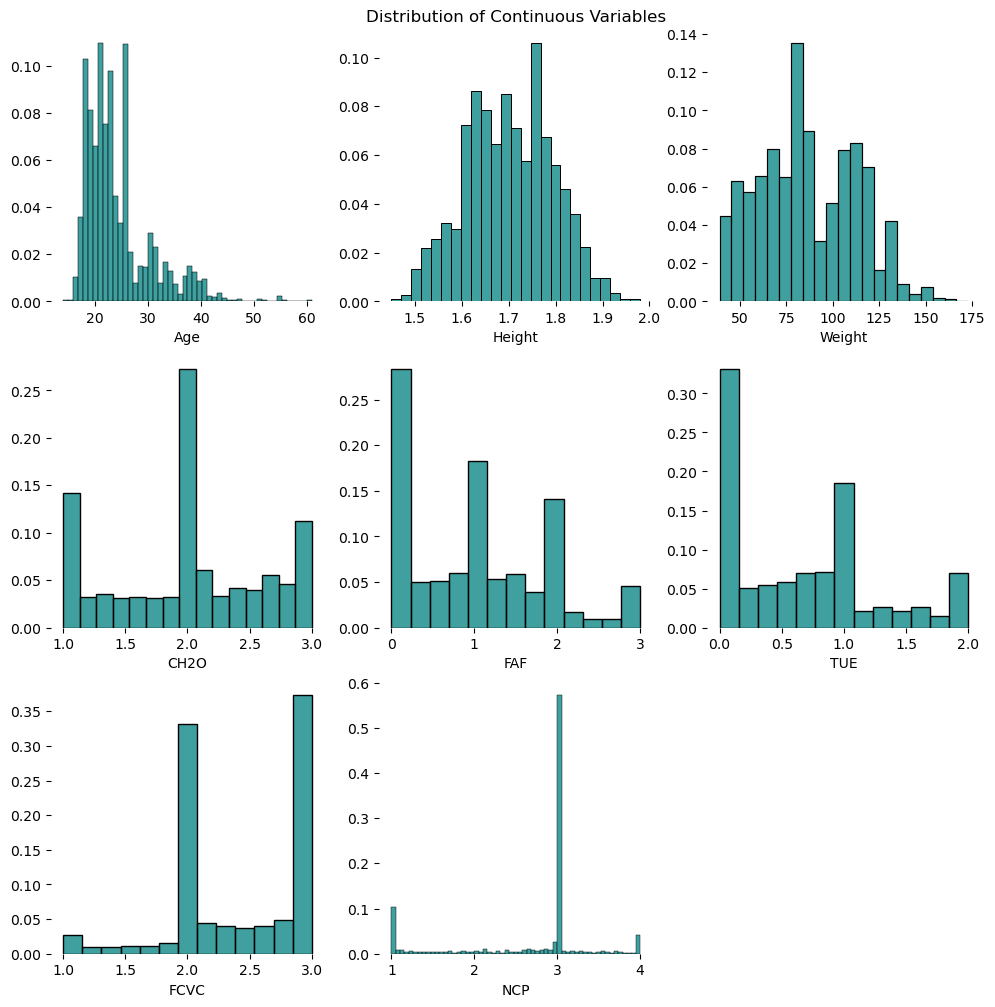

In [180]:
p = len(con_feat)
m = 3
n = int(p/m) +  (p % m > 0)
rows = int(np.ceil(p/3))
plt.figure(figsize=(12, rows*12/3))

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.set_title('Distribution of Continuous Variables')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

for i in range(p):
    plt.subplot(n, m, i+1)
    sns.histplot(df_exp[con_feat[i]], color='Teal', stat='probability')
    ax = plt.gca()
    ax.set(ylabel=None)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_color('none')

### 1.3.4 Categoriacal Features
* According to "SMOKE" and "CALC": basically the dataset is about the people who are non-smokers, but sometimes consuming alcohol
* Eating habits and awareness: sometimes eating high-caloric food ("FAVC"), typically having three main meals a day ("NCP"), and occasionally eating food between meals ("CAEC"), generally not monitoring daily calorie intake ("SCC")
* Transportation: primarily using public transportation ("MTRANS")

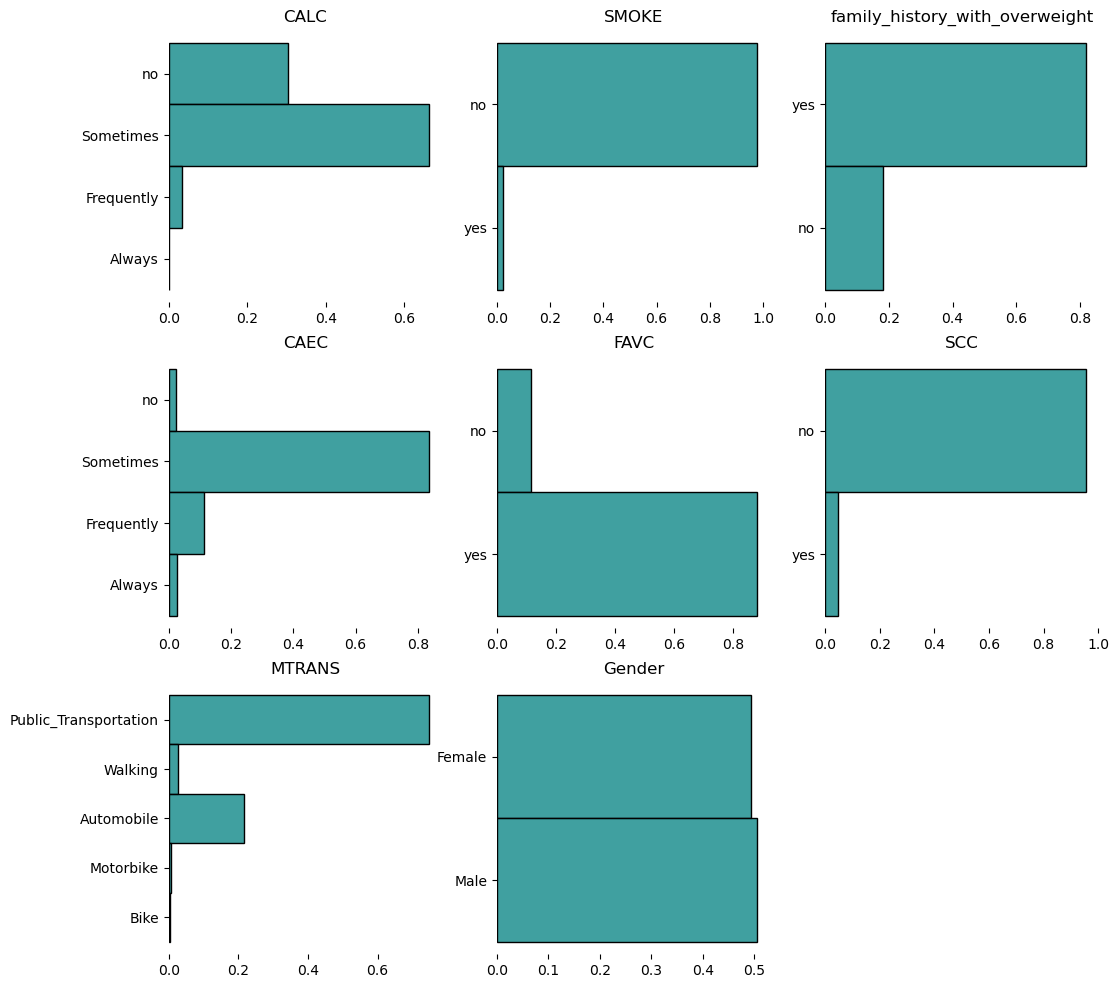

In [181]:
p = len(cat_feat)
m = 3
n = int(p/m) +  (p % m > 0)
rows = int(np.ceil(p/3))
plt.figure(figsize=(12, rows*12/3))

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
#ax.set_title('Distribution of Categorical Variables')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

for i in range(p):
    plt.subplot(n, m, i+1)
    sns.histplot(y = df_exp[cat_feat[i]], color='Teal', stat = 'probability')
    ax = plt.gca()
    ax.set_title(str(cat_feat[i]))
    ax.set(ylabel=None)
    ax.set(xlabel=None)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_color('none')

## 1.4. Correlation

### 1.4.1 Correlation Matrix of Numerical Variables (based on is_obesity)
* Weight is highly correlated with is_obesity
* Age shows correlation with the target to some degree

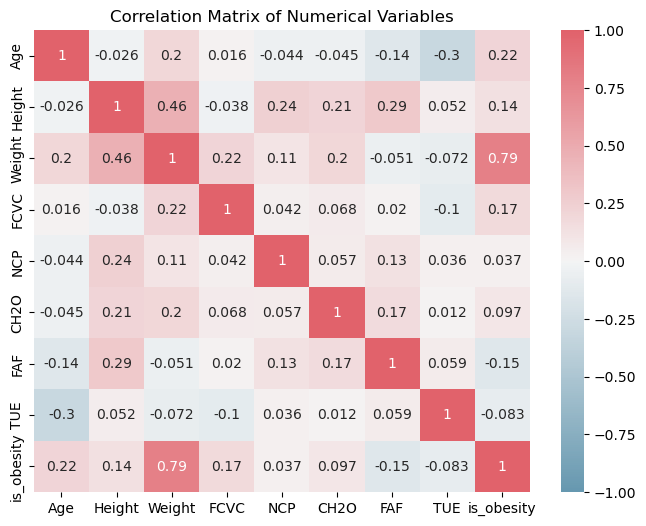

In [244]:
corr_matrix = df_exp[num_cols+['is_obesity']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(230, 10, n=1001), vmin=-1, vmax=1, alpha=0.8)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### 1.4.2 Crosstab for Categorical Variables  (based on is_obesity)
* There is a higher likelihood of obesity among individuals with a family history of being overweight.

* Regularly monitoring calorie intake (“SCC”) appears to help prevent obesity. In contrast, those who frequently consume high-calorie foods are at greater risk ( “FAVC”).

* Using public transportation or automobiles is associated with a higher risk of obesity compared to more active modes of transport, such as walking or biking.


In [253]:
def crosstabplots(X, y):
    colors = sns.color_palette()

    labels = list(X.columns)

    N, p = X.shape

    rows = int(np.ceil(p/2))

    fig, axes = plt.subplots(rows, 2, figsize=(12, rows*(12/3)))

    for i, ax in enumerate(fig.axes):
        if i < p:

            table=pd.crosstab(y, X.iloc[:,i])
            table = (table/table.sum()).iloc[1,:]
            (table.T).sort_index().plot(kind='bar', alpha=0.7, ax=ax, color=colors[i % len(colors)])

            ax.set_title(labels[i])
            ax.set_ylabel('')
            ax.set_xlabel('')
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()

    return fig, axes

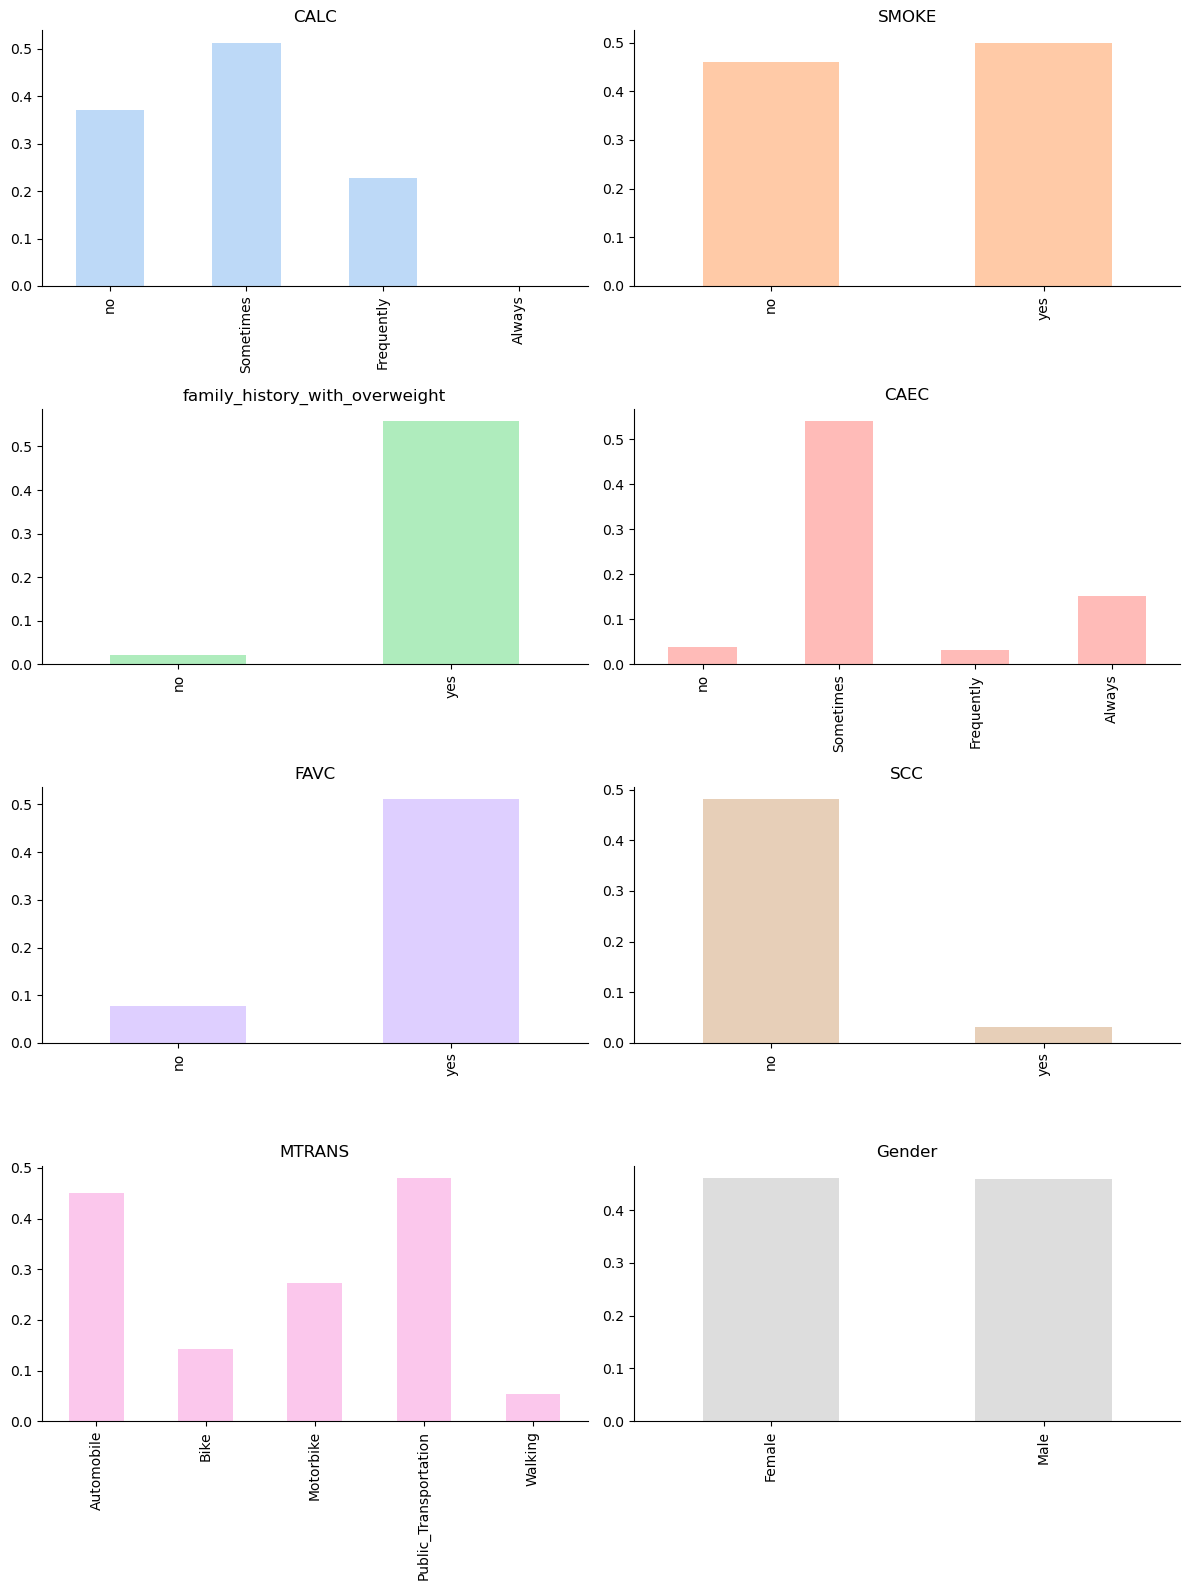

In [319]:
crosstabplots(df_exp[cat_feat], df_exp['is_obesity'])
plt.show()

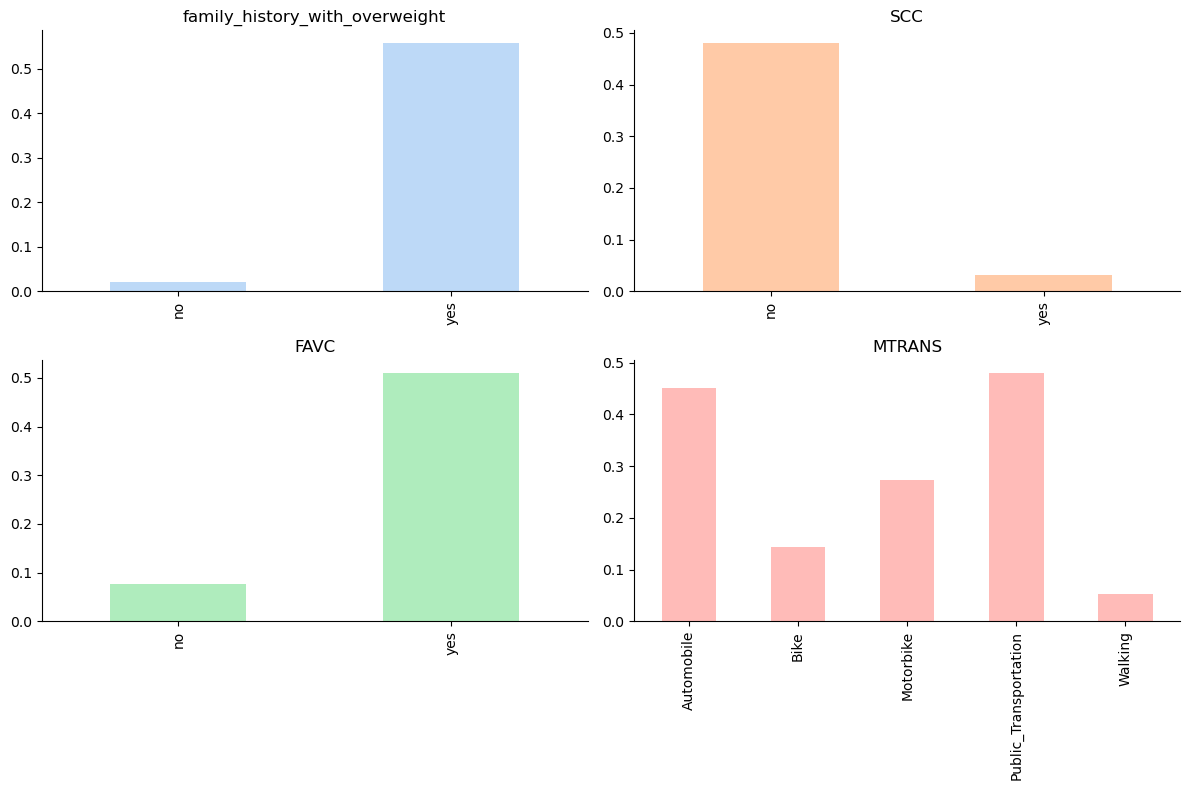

In [321]:
crosstabplots(df_exp[["family_history_with_overweight", "SCC", "FAVC", "MTRANS"]], df_exp['is_obesity'])
plt.show()

### 1.4.3 Deep Dive
* Detailed correlation analysis on some specific features.

**Height & Weight & Obesity Level**
* It's obvious that obesity is indicated by weight in relation to height. This is why we recommend to introduce a derived feature Body Mass Index (BMI) for the later modeling part.

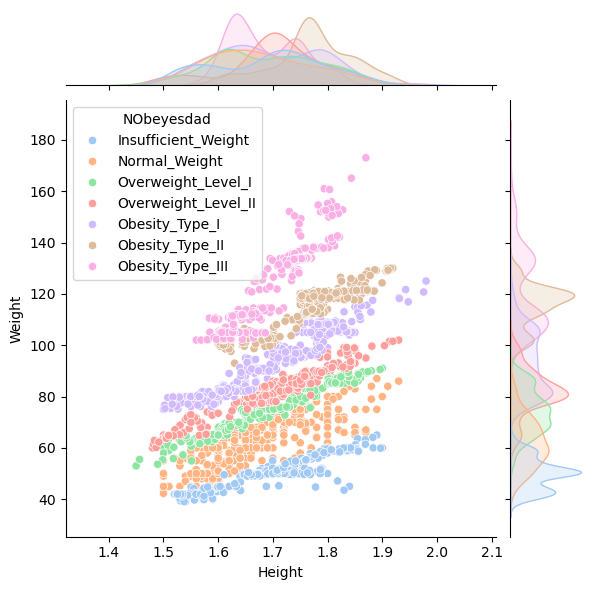

In [313]:
sns.jointplot(data=df_exp,
                x='Height',
                y='Weight',
                hue='NObeyesdad')

**Age & Obesity Level**
* Younger generations, around 20, are less likely to have obesity, while when they get older, they are more likely to gain weight, increasing the risk of getting obesity.

<Axes: xlabel='Age', ylabel='NObeyesdad'>

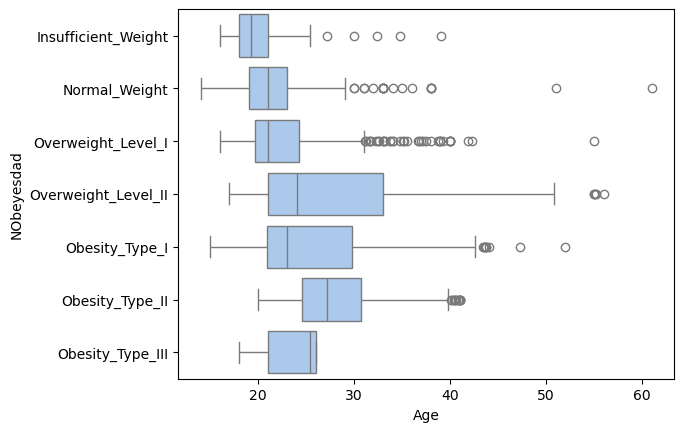

In [315]:
sns.boxplot(data=df_exp, x='Age', y='NObeyesdad')

**Physical Activity & Obesity Level**
* Those who do physical activity more than 2 times are less likely to have obesity type 2 or 3.

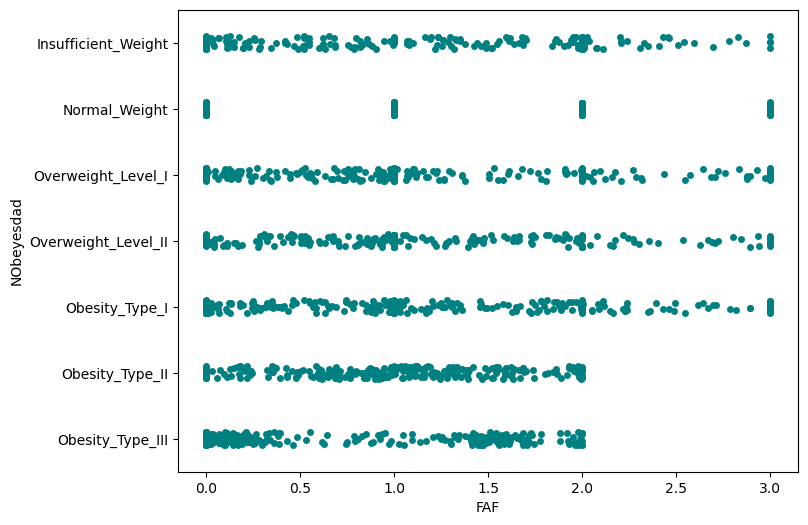

In [323]:
plt.figure(figsize=(8, 6))
sns.stripplot(y='NObeyesdad', x='FAF', data=df_exp, jitter=True, color='teal')
plt.show()

## 2. Data Preparation

In [326]:
import pandas as pd
from soupsieve.util import lower

GENDER = 'Gender'
AGE = 'Age'
HEIGHT = 'Height'
WEIGHT = 'Weight'
FAMILY_HISTORY = 'family_history_with_overweight'
FAVC = 'FAVC'
FCVC = 'FCVC'
NCP = 'NCP'
CAEC = 'CAEC'
SMOKE = 'SMOKE'
CH2O = 'CH2O'
SCC = 'SCC'
FAF = 'FAF'
TUE = 'TUE'
CALC = 'CALC'
MTRANS = 'MTRANS'
NOBEYESDAD = 'NObeyesdad'

In [327]:
# convert the fields(FAMILY_HISTORY, FAVC, SMOKE, SCC) in the data.
# Convert “yes” to 1 and “no” to 0.
for col in [FAMILY_HISTORY, FAVC, SMOKE, SCC]:
    df[col] = df[col].apply(lambda x: 1 if lower(x) == 'yes' else 0)

print(df)

      Gender        Age    Height      Weight  family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                               1   
1     Female  21.000000  1.520000   56.000000                               1   
2       Male  23.000000  1.800000   77.000000                               1   
3       Male  27.000000  1.800000   87.000000                               0   
4       Male  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106  Female  20.976842  1.710730  131.408528                               1   
2107  Female  21.982942  1.748584  133.742943                               1   
2108  Female  22.524036  1.752206  133.689352                               1   
2109  Female  24.361936  1.739450  133.346641                               1   
2110  Female  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP      

In [328]:
DEFAULT_VALUE = np.nan

def clean(df, column_key, convert_function, default_value):
    for i in range(len(df)):
        val = df.loc[i, column_key]  ## val = df.iloc[i, df.columns.get_loc(column_key)]
        try:
            df.loc[i, column_key] = convert_function(val)
        except (ValueError, TypeError):
            print(f'Replacing {val} with {default_value} in column {column_key} at row {i}')
            df.loc[i, column_key] = default_value

#usage
clean(df, AGE, float, DEFAULT_VALUE)
clean(df, HEIGHT, float, DEFAULT_VALUE)
clean(df, WEIGHT, float, DEFAULT_VALUE)
clean(df, FCVC, int, DEFAULT_VALUE)
clean(df, NCP, float, DEFAULT_VALUE)
clean(df, CH2O, float, DEFAULT_VALUE)
clean(df, FAF, float, DEFAULT_VALUE)
clean(df, TUE, int, DEFAULT_VALUE)

In [329]:
dict_GENDER = {v:i for i,v in enumerate(set(df[GENDER]))}
dict_CAEC = {v:i for i,v in enumerate(set(df[CAEC]))}
dict_CALC = {v:i for i,v in enumerate(set(df[CALC]))}
dict_MTRANS = {v:i for i,v in enumerate(set(df[MTRANS]))}
dict_NOBEYESDAD = {v:i for i,v in enumerate(set(df[NOBEYESDAD]))}

# print(dict_GENDER)
# print(dict_CAEC)
# print(dict_CALC)
# print(dict_MTRANS)
# print(dict_NOBEYESDAD)

def trans(df, column_key, dict):
    df[column_key] = df[column_key].apply(lambda x: dict.get(x))

#transform
trans(df, GENDER, dict_GENDER)
trans(df, CAEC, dict_CAEC)
trans(df, CALC, dict_CALC)
trans(df, MTRANS, dict_MTRANS)
trans(df, NOBEYESDAD, dict_NOBEYESDAD)

print(df)


      Gender        Age    Height      Weight  family_history_with_overweight  \
0          1  21.000000  1.620000   64.000000                               1   
1          1  21.000000  1.520000   56.000000                               1   
2          0  23.000000  1.800000   77.000000                               1   
3          0  27.000000  1.800000   87.000000                               0   
4          0  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       1  20.976842  1.710730  131.408528                               1   
2107       1  21.982942  1.748584  133.742943                               1   
2108       1  22.524036  1.752206  133.689352                               1   
2109       1  24.361936  1.739450  133.346641                               1   
2110       1  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC